In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

sed=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/DATOS_,LIMPIOS_PCUNAL/CAUDAL2.xlsx")

cau=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/DATOS_,LIMPIOS_PCUNAL/CAUDAL2.xlsx")

pre=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/DATOS_,LIMPIOS_PCUNAL/PRECIPITACIÓN.xlsx")

Mounted at /content/drive


In [2]:
# Verificar valores nulos
print(sed.isnull().sum())
print(cau.isnull().sum())
print(pre.isnull().sum())

# Eliminar columnas con valores nulos

sed.drop(['Unnamed: 1', 'Unnamed: 3'], axis=1, inplace=True)

cau.drop(['Unnamed: 1', 'Unnamed: 3'], axis=1, inplace=True)

pre.drop(['Unnamed: 1', 'Unnamed: 3'], axis=1, inplace=True)


Fecha                    0
Unnamed: 1             365
Valor:                   0
Unnamed: 3             365
Nivel de Aprobación      0
dtype: int64
Fecha                    0
Unnamed: 1             365
Valor:                   0
Unnamed: 3             365
Nivel de Aprobación      0
dtype: int64
Fecha                    0
Unnamed: 1             367
Valor:                   0
Unnamed: 3             367
Nivel de Aprobación      0
dtype: int64


In [37]:
#Descripción de datos
cau.describe()
sed.describe()
pre.describe()
#Filtro de datos mayores a sus promedios

cau_filtrado = cau[cau['Valor:'] > 4.86]
cau_filtrado
pre_filtrado = pre[pre['Valor:'] > 1.85]
pre_filtrado
sed_filtrado = sed[sed['Valor:'] > 4.86]
sed_filtrado




,Fecha,Valor:,Nivel de Aprobación
262,2023-08-13 00:00,4.895384,Definitivo
263,2023-09-12 00:00,4.924369,Definitivo
264,2023-05-15 00:00,4.953353,Definitivo
265,2023-10-13 00:00,4.953353,Definitivo
266,2023-06-24 00:00,4.996830,Definitivo
...,...,...,...
360,2023-08-01 00:00,30.533820,Definitivo
361,2023-07-18 00:00,37.861744,Definitivo
362,2023-09-04 00:00,42.504716,Definitivo
363,2023-07-24 00:00,62.482051,Definitivo


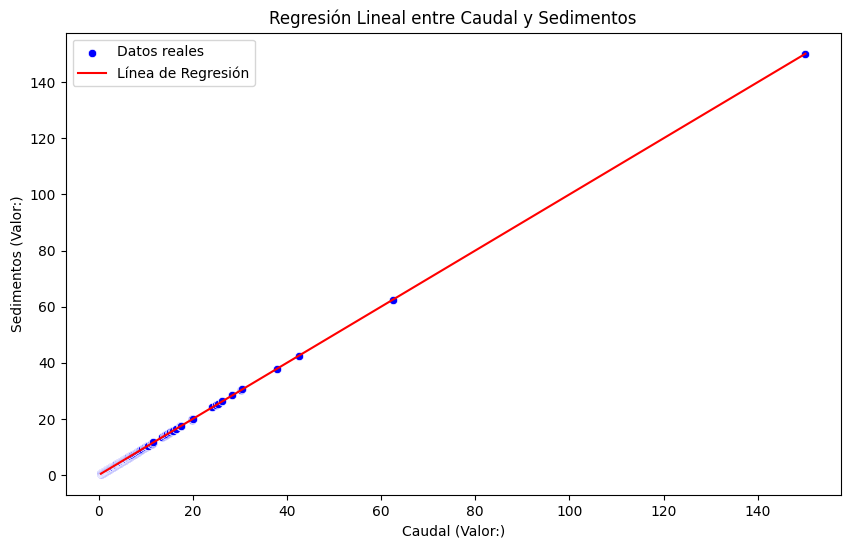

Pendiente: 0.9999999999999999
Intercepto: 2.2680469036898017e-16


In [50]:
#regresoin lineal CaudalxSedimientos
# Combinar caudal y sedimentos para eliminar valores nulos y asegurar longitudes iguales
df2 = pd.DataFrame({
    'Caudal': cau_filtrado['Valor:'],
    'Sedimentos': sed_filtrado['Valor:']
})

# Eliminar filas con valores nulos
df = df.dropna()

# Convertir a arrays
X = df['Caudal'].values
y = df['Sedimentos'].values

# Ajustar una línea recta (regresión lineal)
pendiente, intercepto = np.polyfit(X, y, 1)

# Crear valores predichos
y_pred = pendiente * X + intercepto

# Visualizar los resultados
plt.figure(figsize=(10,6))
sns.scatterplot(x=X, y=y, label='Datos reales', color='blue')
plt.plot(X, y_pred, color='red', label='Línea de Regresión')
plt.xlabel('Caudal (Valor:)')
plt.ylabel('Sedimentos (Valor:)')
plt.title('Regresión Lineal entre Caudal y Sedimentos')
plt.legend()
plt.show()

# Mostrar resultados
print(f'Pendiente: {pendiente}')
print(f'Intercepto: {intercepto}')

#Se puede observar el aumento de caudal respeto al aumento de los sedimientos,
#Esto se explica pues entre más sedimientos se hace más dificil que el agua baje por el alcantarillado.
#Aunque no se pueda hacer una regresion entre caudal y precipitación (Filtradas) por la diferencia en n° datos,
#es evidente que tambien es positiva pues entre más agua caiga, más flujo habra de la misma;
#En este orden de ideas se puede conlcuir que la variable que conecta las precipitaciones
#con los sedimientos y por lo tanto las inundaciones, es el caudal.

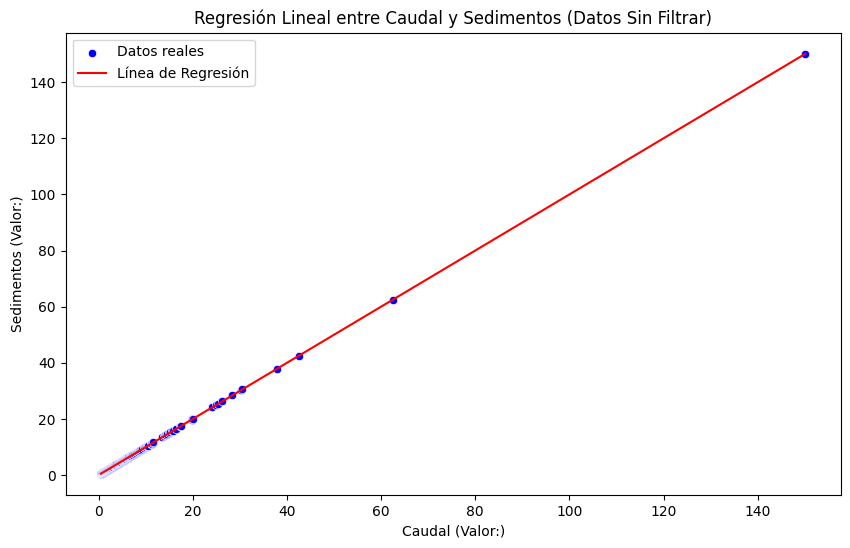

Pendiente: 0.9999999999999999
Intercepto: 2.2680469036898017e-16


In [49]:
df2 = pd.DataFrame({
    'Caudal': cau['Valor:'],
    'Sedimentos': sed['Valor:']
})

# Eliminar filas con valores nulos
df = df.dropna()

# Convertir a arrays
X = df['Caudal'].values
y = df['Sedimentos'].values

# Ajustar una línea recta (regresión lineal)
pendiente, intercepto = np.polyfit(X, y, 1)

# Crear valores predichos
y_pred = pendiente * X + intercepto

# Visualizar los resultados
plt.figure(figsize=(10,6))
sns.scatterplot(x=X, y=y, label='Datos reales', color='blue')
plt.plot(X, y_pred, color='red', label='Línea de Regresión')
plt.xlabel('Caudal (Valor:)')
plt.ylabel('Sedimentos (Valor:)')
plt.title('Regresión Lineal entre Caudal y Sedimentos (Datos Sin Filtrar)')
plt.legend()
plt.show()

# Mostrar resultados
print(f'Pendiente: {pendiente}')
print(f'Intercepto: {intercepto}')

In [53]:
#No se planteara una regresion entre Precipitación y sedimientos, pues no tienen ninguna relación en terminos climaticos; el analisis numerico no tendria sentido
#el aumento de cualqueiera de las dos no va a afectar la otra.

#Herramienta de peligro de inundación

# Definir los promedios
promedio_pre = 1.85
promedio_sed = 4.86
promedio_cau = 4.86

# Función para validar entrada numérica
def obtener_valor(mensaje):
    while True:
        valor = input(mensaje)
        try:
            return float(valor)
        except ValueError:
            print("Por favor, inserte un valor numérico válido")

# Solicitar valores al usuario
Pre = obtener_valor("Inserte la cantidad de precipitación: ")
Sed = obtener_valor("Inserte la cantidad de sedimentos: ")
Cau = obtener_valor("Inserte la cantidad de caudal: ")

# Verificar cuántos valores están por encima del promedio
contador = 0
if Pre > promedio_pre:
    contador += 1
if Sed > promedio_sed:
    contador += 1
if Cau > promedio_cau:
    contador += 1

# Evaluar el nivel de peligro
if contador == 1:
    print("⚠️ Peligro bajo de inundación.")
elif contador == 2:
    print("⚠️⚠️ Peligro medio de inundación.")
elif contador == 3:
    print("⚠️⚠️⚠️ Peligro alto de inundación.")
else:
    print("5Sin peligro de inundación.")


Inserte la cantidad de precipitación: a
Por favor, inserte un valor numérico válido
Inserte la cantidad de precipitación: "a
Por favor, inserte un valor numérico válido
Inserte la cantidad de precipitación: "2
Por favor, inserte un valor numérico válido
Inserte la cantidad de precipitación: 2"
Por favor, inserte un valor numérico válido
Inserte la cantidad de precipitación: 5
Inserte la cantidad de sedimentos: 5
Inserte la cantidad de caudal: 5
⚠️⚠️⚠️ Peligro alto de inundación.
